In [2]:
#importing all the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#reading data from remote link
url= 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
dataset= pd.read_csv(url)
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


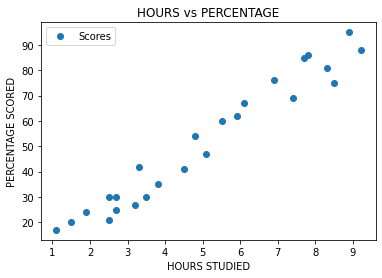

In [4]:
#plotting the distribution of score
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('HOURS vs PERCENTAGE')
plt.xlabel('HOURS STUDIED')
plt.ylabel('PERCENTAGE SCORED')
plt.show()

In [5]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

The next step is to split the data into traing set and test set

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

TRAINING THE ALGORITHM
now since we have split our data into training set and test set its time to create our model

In [7]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

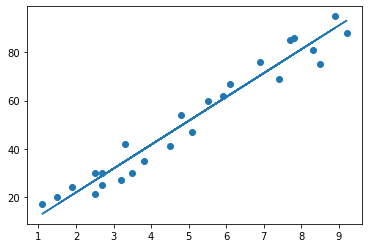

In [8]:
#plotting the regression line
line= regressor.coef_*X+regressor.intercept_
#plotting for test data
plt.scatter(X,y)
plt.plot(X,line);
plt.show()




MAKING PREDICTION
Now we have trained our algorithm its time to make some prediction

In [23]:
print(X_test) #testing data - in hours
y_pred= regressor.predict(X_test) #predicting the score

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [24]:
#comparing actual vs predicted
df= pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [25]:
#you can also test with your own data
hours= [[9.25]]
own_pred= regressor.predict(hours)
print('NO. of hours={}'.format(hours))
print('Predicted score={}'.format(own_pred[0]))


NO. of hours=[[9.25]]
Predicted score=93.69173248737538


Evaluating the Model
The final step is to evaluate the model. Here we have choosen the mean square error. there are many such matrix error.

In [26]:
from sklearn import metrics
print('Mean Absolute Error:',
     metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
